##### Load libs:

In [1]:
import pandas as pd
import sqlite3

##### 2.Create connect

In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

##### 3.Load data:

In [3]:
data=pd.io.sql.read_sql(
    "SELECT " \
        "DATE(timestamp) AS date, " \
        "CASE " \
            "WHEN TIME(timestamp) BETWEEN '00:00:00' AND '03:59:59' THEN 'night' " \
            "WHEN TIME(timestamp) BETWEEN '04:00:00' AND '09:59:59' THEN 'morning' " \
            "WHEN TIME(timestamp) BETWEEN '10:00:00' AND '16:59:59' THEN 'afternoon' " \
            "WHEN TIME(timestamp) BETWEEN '17:00:00' AND '23:59:59' THEN 'evening' " \
        "END AS time_of_day, " \
		"COUNT(*) AS cnt " \
    "FROM checker " \
    "WHERE uid LIKE 'user_%' " \
	"GROUP BY date, time_of_day",
    connect
)
data['date']=pd.to_datetime(data['date'])
data

,date,time_of_day,cnt
0,2020-04-17,afternoon,10
1,2020-04-17,morning,13
2,2020-04-18,afternoon,33
3,2020-04-18,evening,35
4,2020-04-18,morning,1
...,...,...,...
85,2020-05-20,evening,10
86,2020-05-20,morning,7
87,2020-05-21,afternoon,27
88,2020-05-21,evening,21


In [6]:
data.count()

date           90
time_of_day    90
cnt            90
dtype: int64

In [7]:
pivot_df.count()

time_of_day
night        35
morning      35
afternoon    35
evening      35
dtype: int64

##### 4.Bar:

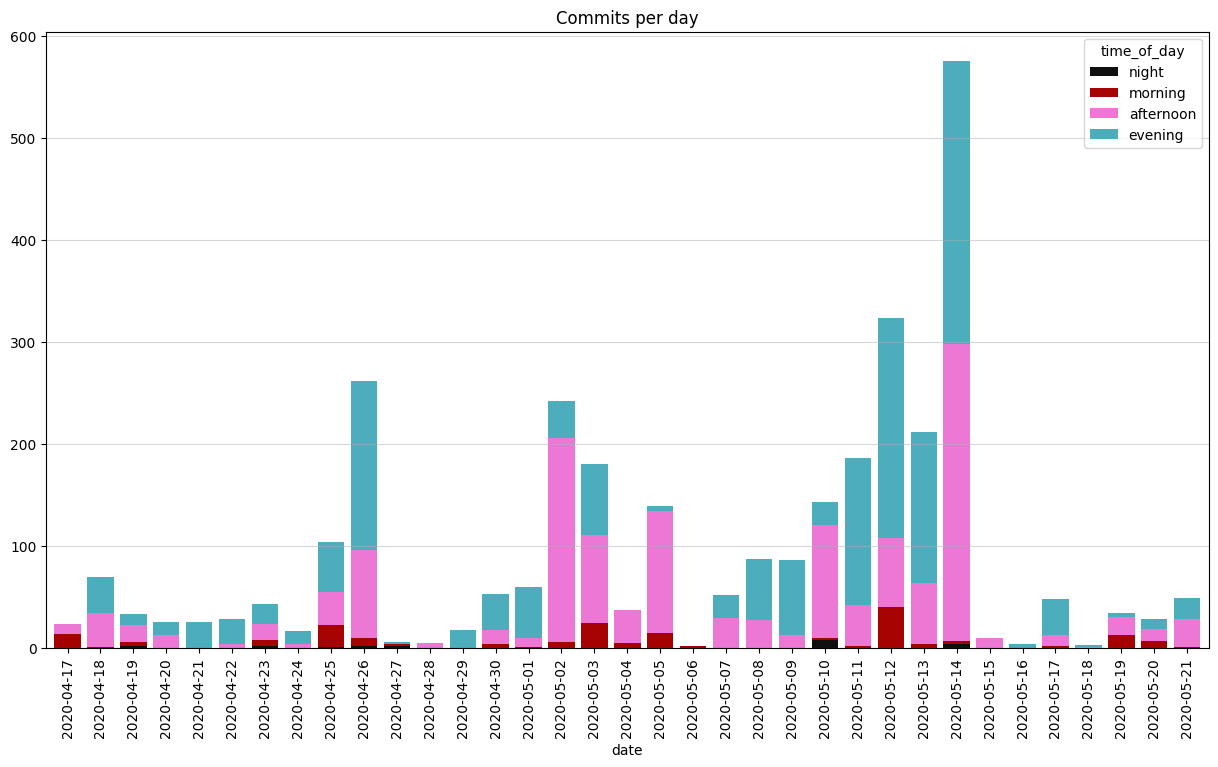

In [4]:
pivot_df = data.pivot(index='date', columns='time_of_day', values='cnt').fillna(0)

pivot_df = pivot_df[pivot_df.mean().sort_values(ascending=True).index.tolist()]

pivot_df.index = pivot_df.index.strftime('%Y-%m-%d')
ax=pivot_df.plot(
    kind='bar',
	title = 'Commits per day',
    stacked=True,
    figsize=(15, 8),
    color=['#0f0f0f','#a70202','#EC77D4','#4cadbc'],
    width=0.8
)

ax.grid(True, axis='y', alpha=0.5)

##### 5.Question:

Когда наши пользователи обычно выполняют лабораторные работы: ночью, утром, днем ​​или вечером?<br>Ответ: Преимущественно днём и вечером

В какой день наибольшее количество коммитов?<br>Ответ: 14-05-2020

В какой день наибольшее количество коммитов и при этом количество коммитов вечером больше, чем днем?<br>Ответ: 12-05-2020

##### 6.Close connect:

In [5]:
connect.close()